# Support Vector Machine :  Problem 1
## SVM with SCIKIT

## Disclaimer
These exercises are based on the Stanford Machine Learning Course [CS229](http://cs229.stanford.edu) of Andrew Ng. The environment of the exercise have been tuned to the theory content taught at Ravensburg Weingarten University.

We are using the Python programming language. If you don't know Python or if you would like to refresh your memory, take a look at the [Python tutorial](http://docs.python.org/tut/).
We will mostly work with NumPy, the fundamental package for scientific computing in Python. Please read the [NumPy quickstart tutorial](https://numpy.org/devdocs/user/quickstart.html). In addition, the documention of MatPlotLib and Scipy lib can be found here: .[MatplotLib](https://matplotlib.org/). [Scipy](https://docs.scipy.org/doc/scipy/reference/tutorial/).

### Dataset : 

In the first half of this exercise, you will be using support vector machines
(SVMs) with example of linearly seperable 2D datasets. Experimenting with these datasets
will help you gain an intuition of how SVMs work. In the second half, you will be using a non-linear 2D dataset and how to use a Gaussian
kernel with SVMs.

### 1.A Visualize the linear separable dataset

We will begin by with a 2D example dataset which can be separated by a
linear boundary. In this dataset, the positions of the positive examples (indicated with +) and the
negative examples (indicated with o) suggest a natural separation indicated by the gap. However, notice that there is an outlier positive example + on the far left at about (0.1, 4.1). As part of this exercise, you will also see how this outlier affects the SVM decision boundary.

In [125]:
# Used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
import matplotlib.pyplot as plt

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# for plotting grayscale
from PIL import Image

# Dataframe management
import pandas as pd

In [126]:
# Load the linear data
df = pd.read_csv('./data/ex6data1.csv')

# Extract the data present in frame heads
X = df[['x','y']].values 
y = df['label'].values

m = y.size

print('There are total of {} points in dataset'.format(m))

There are total of 51 points in dataset


Plotting is done using a python library 'matplotlib'. See documention of the library at https://matplotlib.org/

In [127]:
def plot(X,y):

    # Find Indices of Positive and Negative Examples, to visualize separately
    pos = y == 1
    neg = y == -1
    
    # Plot example
    plt.plot(X[pos, 0], X[pos, 1], '+', mfc='b',ms=10)
    plt.plot(X[neg, 0], X[neg, 1], 'ko', mfc='g', ms=8)
    plt.grid(b=None, which='major', axis='both')
    plt.legend(['Pos', 'Neg'])
    plt.title('Class Plot')
    plt.xlabel('x')
    plt.ylabel('y')
    

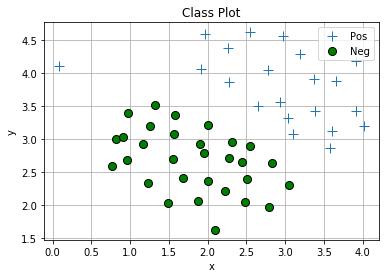

In [124]:
plot(X,y)

### 1.B SVM theory and implementation

The support vector machine solves a constrained optimization problem to find this optimal hyperplane. Given to us the two classes that coulb be separated by a hyperplane. There may exist multiple hyperplanes diving the classes. 

**But which one is the best ?**

The optimum hyperplane would be the one evenly distributed wrt the margin between the two classes. Let us try to understand this with below shown image.

<img src='./graphic/1.png' width='650' height='650'>

Here, the solid line is the hyperplane. The two dashed lines are marked the closest point(s) of each given class. The margin on side side can be denoted as: 

$$
\begin{align}
margin = \frac{w^T}{\lVert w \rVert} (x_j - x_i)
\end{align}
$$

In other words this can be written as: $$margin=\frac{2}{\lVert w \rVert}$$

The objective is here to maximize this margin.
This problem can be moulded and can be written in form of a minimization optimization problem:

$$
\begin{align}
\min_{w,b}\quad & \lVert w \rVert^2  \\
\text{s.t.}\quad & y_i(w^Tx_i + b) \geq 1\\
\end{align}
$$

This can be easily solved with the Scikit library. The constrained optimization problem can be combined and written as **Dual Optimization problem**. One could refer to the theory part to get clear about problems' solution. 



In [128]:
from sklearn import svm

#Create a svm Classifier

clf = svm.SVC(kernel='linear') # Linear Kernel

### Hint: You may want to look up into https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [129]:
solve = clf.fit(X, y)

In [140]:
# Get weight from solution

w = clf.coef_[0]
print('Learned weigt vector = {}'.format(w))

b= clf.intercept_[0]
print('Bias-Coefficient = {}'.format(b))

Learned weigt vector = [1.40718563 2.13398052]
Bias-Coefficient = -10.3488977799


To define a classification line, we consider that the probabilty of the Output Class (y) of a given Input Point (X') is 1/2. We say that Class of a given data point is determined by 

$$y* = sign(kernel(X'))$$. 

With this consideration we can say that equation of line can be determined by follwing:

$$kernel(X') = 0$$ 

Expanding the above equation we get:

$$
w_0* (x) + w_1* (y) + b = 0
$$

Since we already identitifed the **max** and **min** points two plot the line, we can compute the y-axis co-ordinate by following equation:

$$
y = \frac{-(w_0x + b)}{w_1} 
$$

In [141]:
# Set up two points that can be used to plot a line
x_min, x_max = min(X[:, 0]), max(X[:, 0])
plot_x = np.array([x_min, x_max])

# Compute the other axis value based on learned weights
plot_y = -(w[0] * plot_x + b)/w[1]

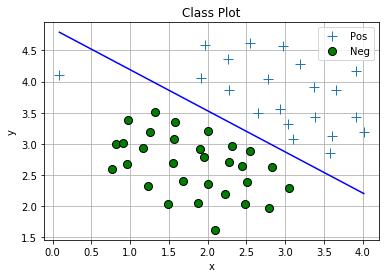

In [142]:
plot(X,y)
plt.plot(plot_x, plot_y, '-b')

### 1.C Non- Linear Dataset

This part of the notebook uses a Non-Linear dataset for SVM problem. The Scikit library offers a set of datasets as toy problems which can be used to implement various concepts. If this sounds interesting to you then feel free to look here what's on offer : https://scikit-learn.org/stable/datasets/index.html 

In [143]:
from sklearn import datasets
circle_X, circle_y = datasets.make_circles(n_samples=300, noise=0.075)

def plot_circle(circle_X, circle_y):
    
    # show raw non-linear data
    plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='+')
    plt.grid(b=None, which='major', axis='both')
    plt.title('Class Plot')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

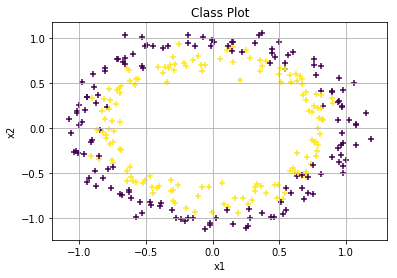

In [144]:
plot_circle(circle_X, circle_y)

### Kernels: 

Kernels are set of mathematical algorithm functions that are used in SVMs. Their job is to take the input data and transform it into a required form (can be incorporated well in the Optimization Equation). 

We saw above the **Linear Kernel**.

Linear kernel functions (or the dot product) are faster than most of the others and you have fewer parameters to optimize. Here's the function that defines the linear kernel:

$$
\phi(x)=w^TX+b
$$

Here in this equation, w is the weight vector that you want to minimize, X is the data that you're trying to classify, and b is the linear coefficient estimated from the training data.

**Using the same Kernel for a non-linear dataset as above doesn't make much sense. There are few more options..**

such as Polynomial Kernel, Sigmoid Kernel, Gaussian Radial Basis Function Kernel (known as RBF).

$$
RBF = k(x,y) = exp(-\gamma \lVert x_j-x_i \rVert^2)
$$

It is a general-purpose kernel; used when there is no prior knowledge about the data. Don't confuse it with the **Gaussian Kernel**. We will be working with that in the next problem.



In [145]:
# make non-linear algorithm for model
nonlinear_clf = svm.SVC(kernel='rbf', C=1.0)

In [146]:
# training non-linear model
nonlinear_clf.fit(circle_X, circle_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [147]:
# Plot the decision boundary for a non-linear SVM problem
def plot_decision(model, points):
    
    # find min and max
    x1lim = np.array([min(points[:, 0]), max(points[:, 0])])
    x2lim = np.array([min(points[:, 1]), max(points[:, 1])])
    
    # create grid to evaluate model
    x1 = np.linspace(x1lim[0], x1lim[1], 50)
    x2 = np.linspace(x2lim[0], x2lim[1], 50)
    Y, X = np.meshgrid(x2, x1)

    # shape data in x1,x2 points
    xy = np.transpose(np.vstack([X.ravel(), Y.ravel()]))
    
    # compute the decision boundary based on the learned model
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot
    plt.contour(X, Y, P, levels=[0,0.1], alpha=0.5, linestyles=['-'])
    

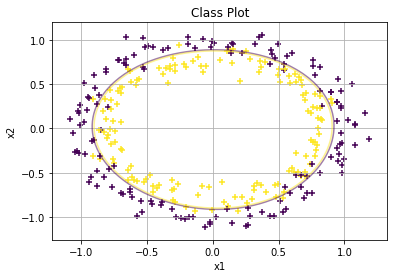

In [148]:
plot_decision(nonlinear_clf, circle_X)
plot_circle(circle_X, circle_y)

# What can you do to further contribute in this notebook ?

1. Try the SVM fitting with different kernels and different values of C.
2. Try to find the accuracy of learned model. (Hint: You can do that by Cross Validtion using sklearn modules)